loIntroducing Fear in the model
=================

Well, now we know the classic SIR model, now we can extend it with fear

We create a compartimental model with 7 possible states for the agents

$S$: Susceptible to the pathogen and fear  
$I_F :$ Infected with fear only  
$I_P :$ Infected with disease only  
$I_{PF}:$ Infected with pathogen and fear  
$R_F:$ Removed from circulation due to fear  
$R_{PF}:$ Removed from circulation due to fear and infected with pathogen  
$R:$ Recovered from pathogen and inmune to fear


We define a rate $\alpha$ for the fear infection and a rate $\beta$ for the disease infection rate, so we have transtions rate as follows

|              | Get scared           | Not get scared           |
|--------------|----------------------|--------------------------|
| Get sick     | $\alpha \beta$       | $(1 -\alpha) \beta$      |
| Not get sick | $\alpha (1 - \beta)$ | $(1 -\alpha) (1 -\beta)$ |

Also we need to define rates for the rate of recovering from fear and from the disease, and the rate of removal to self isolation from susceptibles. 

$\lambda_F$: Rate of removal to self isolation of those infected only with fear  
$\lambda_P$: Rate of removal from infection of those with disease   
$\lambda_{PF}$: Rate of removal to self isolation of those with disease and fear    
$H$: Rate of recovery from fear and return to circulation



We have this flowchart of transitions

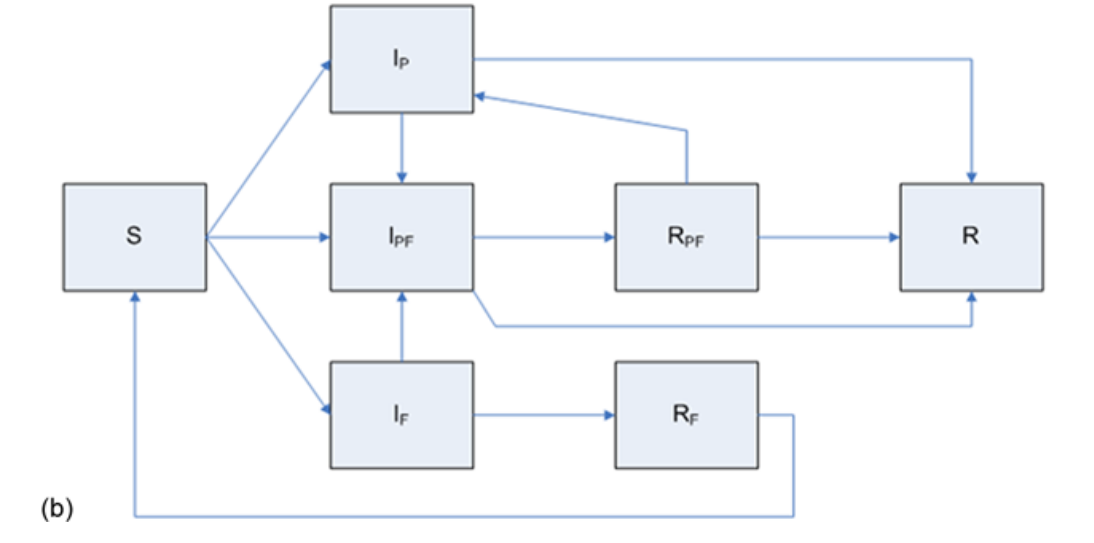

From here we deduce a system of 7 ODEs that we need to resolve numerically

$$
\begin{array}{l}
\frac{d S}{d t}=-\beta(1-\alpha) S I_{P}-(1-\beta) \alpha S I_{P}-\beta \alpha S I_{P}-\alpha S I_{P}-\beta(1-\alpha) S I_{PF}-(1-\beta) \alpha S I_{PF}-\beta \alpha S I_{PF}+H R_{F} \\
\frac{d I_{F}}{d t}=(1-\beta) \alpha S I_{P}+\alpha S I_{F}+(1-\beta) \alpha S I_{PF}-\beta I_{F} I_{P}-\beta I_{F} I_{PF}-\lambda_{F} I_{F} \\
\frac{d I_{P}}{d t}=\beta(1-\alpha) S I_{P}+\beta(1-\alpha) S I_{P F}-\alpha I_{P} I_{F}-\alpha I_{P} I_{PF}-\alpha I_{P} I_{PF}-\lambda_{P} I_{P}+H R_{PF} \\
\frac{d I_{PF}}{d t}=\beta \alpha S I_{P}+\beta \alpha S I_{P F}+\beta I_{F} I_{P}+\beta I_{F} I_{PF}+\alpha I_{P} I_{P}+\alpha I_{P} I_{F}+\alpha I_{P} I_{PF}-\lambda_{P} I_{PF}-\lambda_{PF} I_{PF} \\
\frac{d R_{F}}{d t}=\lambda_{F} I_{F}-H R_{F} \\
\frac{d R_{PF}}{d t}=\lambda_{PF} I_{PF}-\lambda_{P} R_{PF}-H R_{PF} \\
\frac{d R}{d t}=\lambda_{P} I_{P}+\lambda_{P} I_{PF}+\lambda_{P} R_{PF}
\end{array}
$$

We have initial conditions $S(0)=N$ and 0 in time zero for all the other functions


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline


In [9]:

# We fix a population value N
N = 1000

# Initial number of infected with pathogen individuals, IP0.
IP0 = 1
# All the other individuals start in S0
S0 = N - IP0
IPF0, IF0, RPF0, RF0, R0 = 0, 0, 0, 0, 0

#parameters
#we need to set the parameters alpha, beta, H, lambda_F, lambda_PF, lambda_P
"""
lambda_F = 1 / 15
lambda_PF = 1 / 15
lambda_P = 1 / 15
H = 1 / 15
alpha = 0.00020
beta = 0.00016
"""



def derivative(y, t, lambda_F,lambda_PF, lambda_P, H,alpha, beta):
    #we have 7 dependent variables, S, I_F, I_P, I_PF, R_F, R_PF, R
    S, I_F, I_P, I_PF, R_F, R_PF, R = y 
    dydt = [
        -beta * (1 - alpha) * S * I_P - (1 - beta) * alpha * S * I_P - beta * alpha * S * I_F - alpha * S * I_F - beta * (1 - alpha) * S * I_PF - (1 - beta) * alpha * S * I_PF \
        - beta * alpha * S * I_PF + H * R_F,
        (1 - beta) * alpha * S * I_P + alpha * S * I_F + (1 - beta) * alpha * S * I_PF - beta * I_F * I_P - beta * I_F * I_PF - lambda_F * I_F, 
        beta * (1 - beta) * S * I_P + beta * (1 - alpha) * S * I_PF - alpha * I_P * I_P - alpha * I_P * I_F - alpha * I_P * I_PF - lambda_P * I_P + H * R_PF,
        beta * alpha * S * I_P + beta * alpha * S * I_PF + beta * I_F * I_P + beta * I_F * I_PF + alpha * I_P * I_P + alpha * I_P * I_F + alpha * I_P * I_PF \
        - lambda_P * I_PF - lambda_PF * I_PF,
        lambda_F * I_F - H * R_F,
        lambda_PF * I_PF - lambda_P * R_PF - H * R_PF,
        lambda_P * I_P + lambda_P * I_PF + lambda_P * R_PF
    ]
    #print("dydt",dydt)
    return dydt

#y0 is vector of initial conditions
y0 = [S0, IF0, IP0, IPF0, RF0, RPF0, R0]

#grid for solving
t = np.linspace(0,300, 300)
sol = odeint(derivative, y0, t, args=(1 / 15, 1/15, 1/15, 1 / 15, 0.00016, 0.00016))


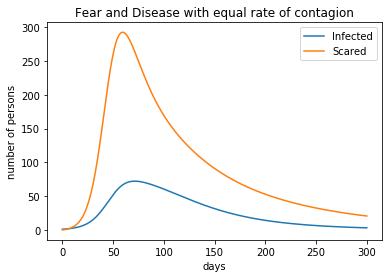

In [10]:
#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label='I_F')
#plt.plot(t, sol[:, 2], label='I_P')
infected = sol[:,2] + sol[:,3]
plt.plot(t, infected, label='Infected')
#plt.plot(t, sol[:, 3], label='I_PF')
#plt.plot(t, sol[:, 4], label='R_F')
#plt.plot(t, sol[:, 5], label='R_PF')
scared = sol[:,1] + sol[:,3]
plt.plot(t, scared, label='Scared')
#plt.plot(t, sol[:, 6], label='R')
plt.legend(loc='best')
plt.xlabel('days')
plt.ylabel('number of persons')

plt.title("Fear and Disease with equal rate of contagion")
plt.savefig("Fear and Disease with equal rate of contagion")

plt.show()

In [11]:
#grid for solving
t = np.linspace(0,300, 300)
sol = odeint(derivative, y0, t, args=(1 / 15, 1/15, 1/15, 1 / 15, 0, 0.00016))


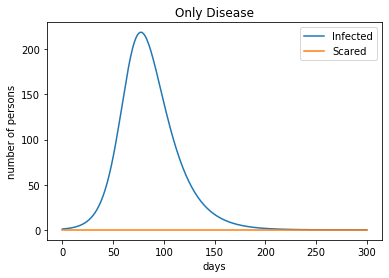

In [12]:
#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label='I_F')
#plt.plot(t, sol[:, 2], label='I_P')
infected = sol[:,2] + sol[:,3]
plt.plot(t, infected, label='Infected')
#plt.plot(t, sol[:, 3], label='I_PF')
#plt.plot(t, sol[:, 4], label='R_F')
#plt.plot(t, sol[:, 5], label='R_PF')
scared = sol[:,1] + sol[:,3]
plt.plot(t, scared, label='Scared')
#plt.plot(t, sol[:, 6], label='R')
plt.legend(loc='best')
plt.xlabel('days')
plt.ylabel('number of persons')

plt.title("Only Disease")
plt.savefig("Only Disease")

plt.show()



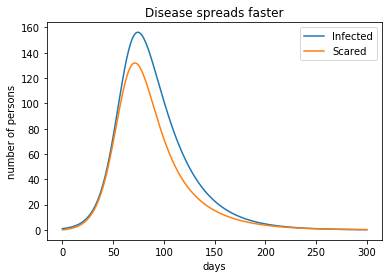

In [13]:
t = np.linspace(0,300, 300)
sol = odeint(derivative, y0, t, args=(1 / 15, 1/15, 1/15, 1 / 15, 0.00008, 0.00016))


#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label='I_F')
#plt.plot(t, sol[:, 2], label='I_P')
infected = sol[:,2] + sol[:,3]
plt.plot(t, infected, label='Infected')
#plt.plot(t, sol[:, 3], label='I_PF')
#plt.plot(t, sol[:, 4], label='R_F')
#plt.plot(t, sol[:, 5], label='R_PF')
scared = sol[:,1] + sol[:,3]
plt.plot(t, scared, label='Scared')
#plt.plot(t, sol[:, 6], label='R')
plt.legend(loc='best')
plt.xlabel('days')
plt.ylabel('number of persons')

plt.title("Disease spreads faster")
plt.savefig("Disease spreads faster")

plt.show()



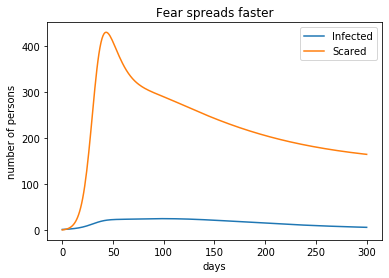

In [14]:
t = np.linspace(0,300, 300)
sol = odeint(derivative, y0, t, args=(1 / 15, 1/15, 1/15, 1 / 15, 0.00024, 0.00016))


#plt.plot(t, sol[:, 0], label='S')
#plt.plot(t, sol[:, 1], label='I_F')
#plt.plot(t, sol[:, 2], label='I_P')
infected = sol[:,2] + sol[:,3]
plt.plot(t, infected, label='Infected')
#plt.plot(t, sol[:, 3], label='I_PF')
#plt.plot(t, sol[:, 4], label='R_F')
#plt.plot(t, sol[:, 5], label='R_PF')
scared = sol[:,1] + sol[:,3]
plt.plot(t, scared, label='Scared')
#plt.plot(t, sol[:, 6], label='R')
plt.legend(loc='best')
plt.xlabel('days')
plt.ylabel('number of persons')

plt.title("Fear spreads faster")
plt.savefig("Fear spreads faster")
plt.show()




